# Лабораторная работа 2

## 1.1 Оценки математического ожидания, дисперсии, медианы

Пусть СВ $\xi$ имеет распределение, задаваемое плотностью $f_{\xi}(x) = \theta^2xe^{-\theta x}$. Для каждого $\theta \in \left\lbrace 0.5, 2, 8 \right\rbrace$:

1. Аналитически вычислить математическое ожидание, дисперсию и математическое ожидание квадрата $\xi$.

**Решение:**

Плотность $f_\xi(x)$ определена при $x > 0$.

$$
E\xi = \int_{0}^{+\infty}f_\xi x dx
$$

$$
E\xi^2 = \int_{0}^{+\infty}f_\xi x^2 dx
$$

$$
D\xi = E\xi^2 - (E\xi) ^ 2
$$

Найдем первообразные для $E\xi, E\xi^2$

1. $E\xi = \int_{0}^{+infty}\theta^2x^2e^{-\theta x} dx = \theta^2 \int_0^{+\infty} x^2 e^{-\theta x}dx = \left| \int_0^{+\infty} x^{n} e^{-a x}\,dx = \frac{n!}{a^{n+1}}, \quad a > 0,\ n \in \mathbb{N}\right| = \left|n = 2, a = \theta \right| = \theta^2 \cdot \frac{2}{\theta^3} = \frac{2}{\theta}$
2. $E\xi^2 = \int_{}^{}\theta^2x^3e^{-\theta x} dx = \theta^2 \int_0^{+\infty} x^3 e^{-\theta x} dx = \left|n = 3, a = \theta \right| = \theta^2 \cdot \frac{3!}{\theta^4} = \frac{6}{\theta^2}$
3. $D\xi = E\xi^2 - (E\xi) ^ 2 = \frac{6}{\theta^2} - (\frac{2}{\theta})^2 = \frac{2}{\theta^2}$

2. Для $k \in \left\lbrace 2^4, 2^5, \cdots, 2^{15} \right\rbrace$ построить выборку из $k$ элементов. Для каждой из них посчитать оценки: математического ожидания, дисперсии и квадрата математического ожидания параметра из варианта. Для каждой из выборок и оценок визуализировать это все
на графиках (для каждой оценки - свой график), где по вертикальной оси - оценка, а по горизонтальной - $k$, плюс, добавьте горизонтальную линию, отвечающую за аналитически полученную оценку.

In [88]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 

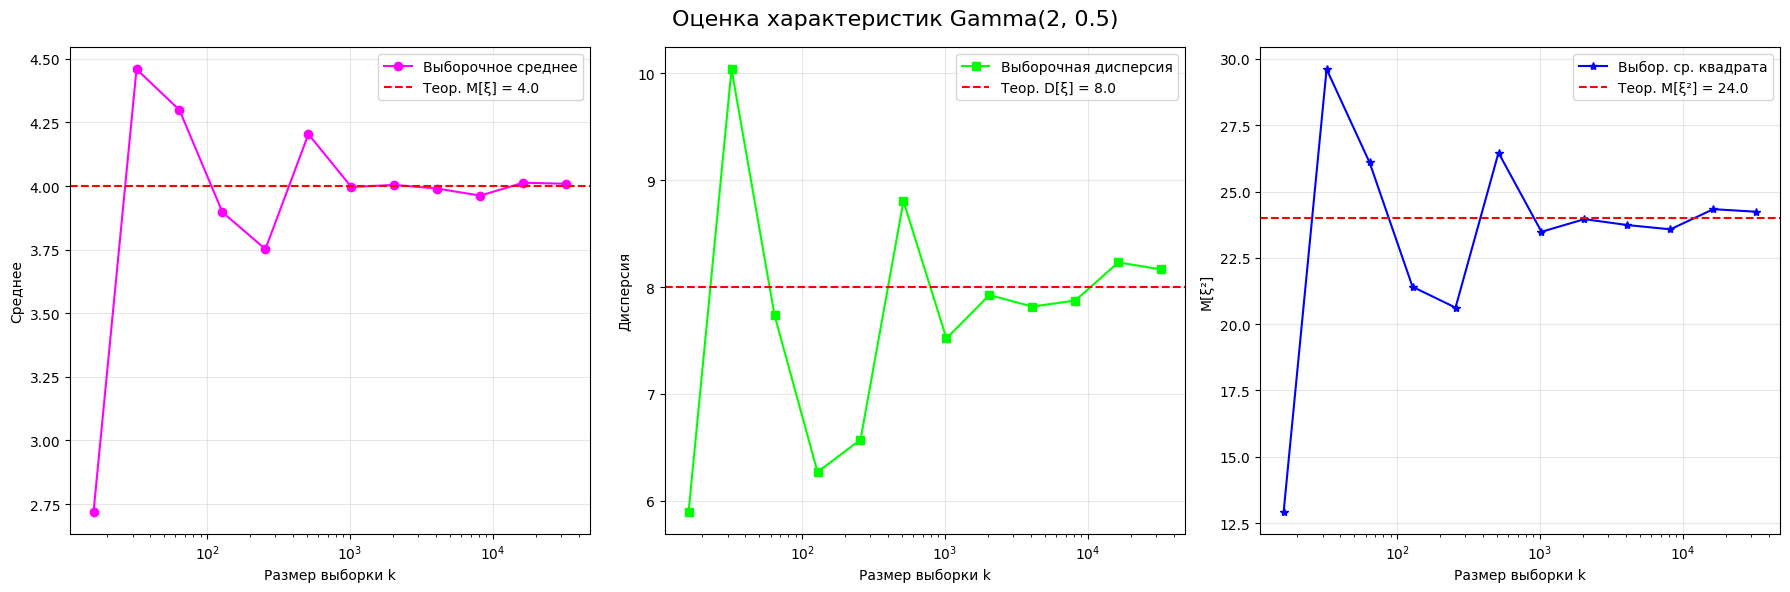

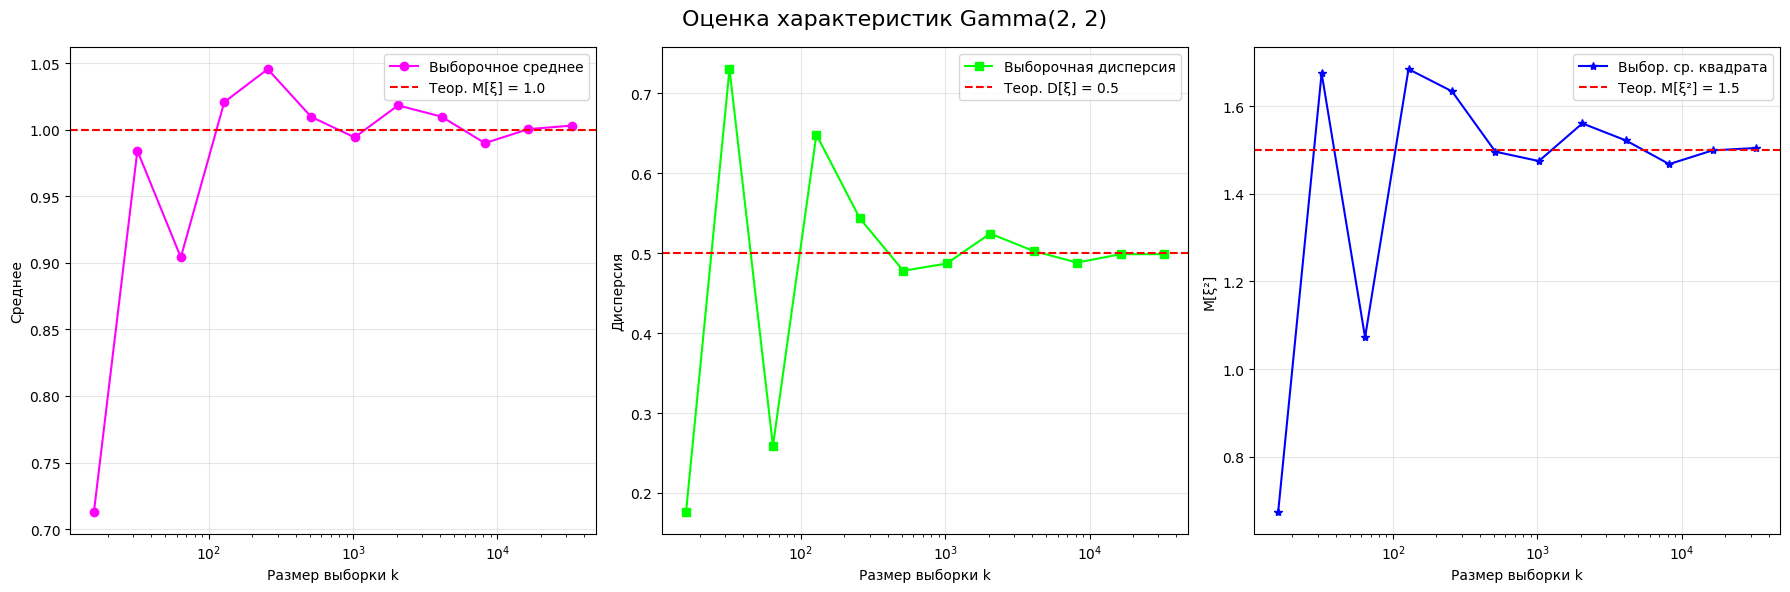

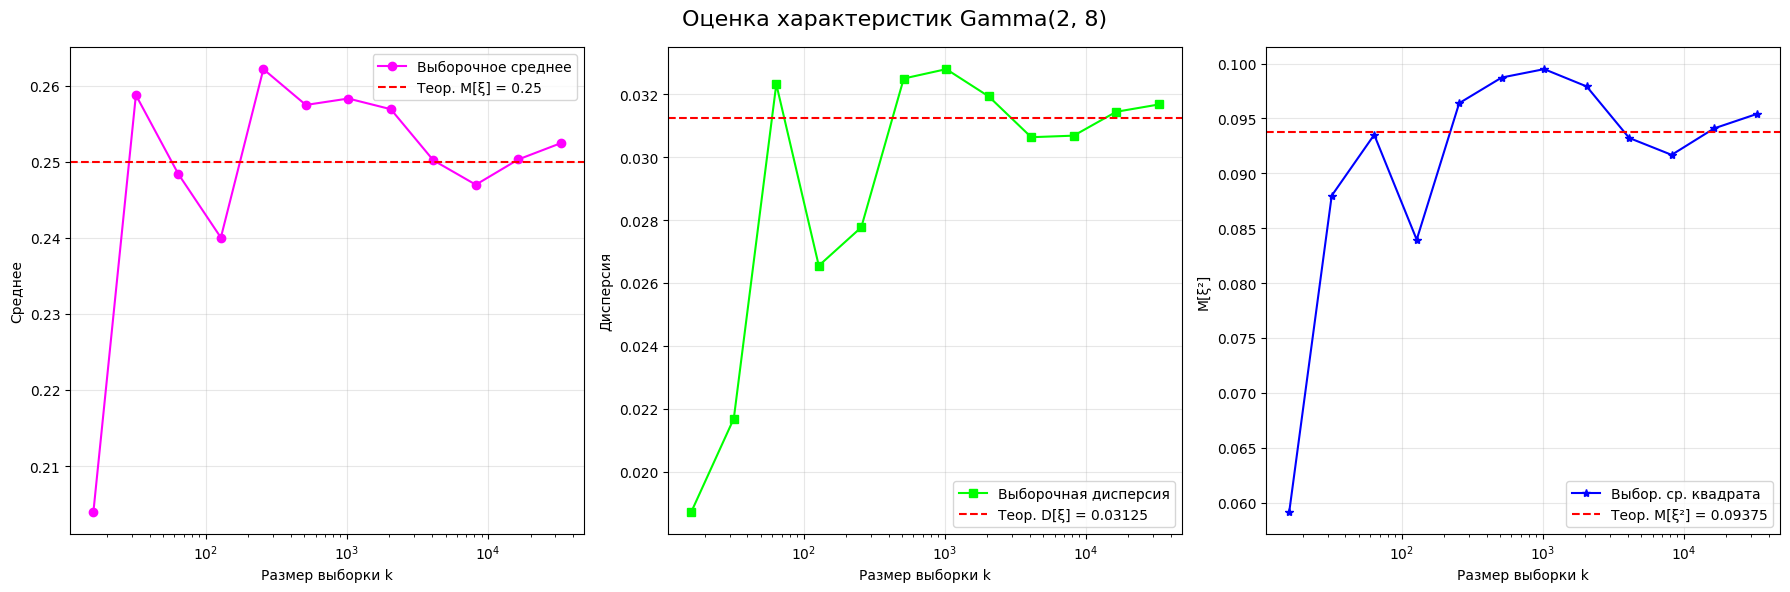

In [ ]:
thetas = [0.5, 2, 8]
ks = [2 ** i for i in range(4, 16)]

for theta in thetas:
    
    true_mean = 2 / theta
    true_var = 2 / (theta ** 2)
    true_mean2 = true_var + true_mean ** 2

    mean = []
    var = []
    mean2 = []
    
    for k in ks:
        sample = stats.gamma.rvs(a = 2, scale = 1 / theta, size = k)
        mean.append(sample.mean())
        var.append(sample.var(ddof = 1))
        mean2.append((sample ** 2).mean())
    
    fig, axes = plt.subplots(1, 3, figsize = (18, 6))
    fig.suptitle(f'Оценка характеристик Gamma(2, {theta})', fontsize=16)

    axes[0].plot(ks, mean, 'o-', label = 'Выборочное среднее', color = 'magenta')
    axes[0].axhline(true_mean, color = 'red', linestyle = '--', label = f'Теор. M[ξ] = {true_mean}')
    axes[0].set_xscale('log')
    axes[0].set_xlabel('Размер выборки k')
    axes[0].set_ylabel('Среднее')
    axes[0].legend()
    axes[0].grid(True, alpha = 0.3)

    axes[1].plot(ks, var, 's-', label ='Выборочная дисперсия', color ='lime')
    axes[1].axhline(true_var, color ='red', linestyle ='--', label =f'Теор. D[ξ] = {true_var}')
    axes[1].set_xscale('log')
    axes[1].set_xlabel('Размер выборки k')
    axes[1].set_ylabel('Дисперсия')
    axes[1].legend()
    axes[1].grid(True, alpha = 0.3)

    axes[2].plot(ks, mean2, '*-', label ='Выбор. ср. квадрата', color ='blue')
    axes[2].axhline(true_mean2, color ='red', linestyle ='--', label =f'Теор. M[ξ²] = {true_mean2}')
    axes[2].set_xscale('log')
    axes[2].set_xlabel('Размер выборки k')
    axes[2].set_ylabel('M[ξ²]')
    axes[2].legend()
    axes[2].grid(True, alpha = 0.3)

    plt.tight_layout()
    plt.show()

2. Дана плотность распределения случайной величины $\xi$:

$$
f_{\xi}^{\lambda, a} = \left\lbrace \begin{array}{cl}
\lambda e^{-\lambda(x-a)}, & \ x \geq 2 \\
0, & \ \text{else}
\end{array} \right.
$$

Пусть $(\lambda, a) = (2, 2)$
1. Аналитически вычислите значение моды, математического ожидания и медианы.

**Решение:**

**Математическое ожидание:**

$$
E\xi = \int_{2}^{+\infty} 2xe^{-2(x-2)}dx = 2\int_{2}^{+\infty} xe^{-2(x-2)}dx = |t = x - 2, x = t + 2, dx = dt| = 2\int_{2}^{+\infty} (t + 2)e^{-2(t)}dt
$$

По формуле:
$$
\int_{}^{} udv = uv - \int_{}^{} vdu
$$

Замена:
$$
\begin{vmatrix}
u = t - 2 & dv = -\frac{1}{e^{2t}} \\
du = dt & v = -\frac{1}{2e^{2t}}
\end{vmatrix}
$$

$$
-\frac{t + 2}{e^{2t}} + \int_{}^{} \frac{dt}{e^{2t}} = -\frac{t + 2}{e^{2t}} -\frac{dt}{2e^{2t}} = -\frac{2t + 5}{2e^{2t}}$$

Заменим $t$ на $x - 2$:

$$
-\frac{2(x - 2) + 5}{2e^{2(x - 2)}} = -\frac{2x + 1}{2e^{2(x - 2)}}
$$

$$F(2) = -\frac{5}{2}$$

$$F(+\infty) = 0$$

Таким образом: $E\xi = 2.5$

**Медиана:**

$$
    F(m) = 0.5
$$

$\int_{2}^{x}2e^{-2(t-2)}dt = 2 \int_{2}^{x}e^{-2(t-2)}dt = |u = t - 2, u = t + 2, du = dt| = 2 \int_{0}^{x - 2}e^{-2u}du = -e^{-2u}|_{x}^{x - 2} = 1 - e^{-2(x - 2)}$

$$
1 - e^{-2(x - 2)} = 0.5 \\ e^{-2(x - 2)} = 0.5 \\ \ln{e^{-2(x - 2)}} = -\ln{2} \\ 2(x - 2) = \ln{2} \\ x = \frac{\ln{2}}{2} + 2
$$

Таким образом: медиана $= \frac{\ln{2}}{2} + 4 \approx 2.3466$

**Мода:** непрерывной случайной величины - это значение, в котором плотность вероятности **максимальна**.

$$
f_{\xi}(x)' = -4e^{-2(x - 2)}
$$

$$
-4e^{-2(x - 2)} < 0 \text{ при } x \ge 2
$$

Значит $f_{\xi}(x)$ строго возрастающая, и максимум это функции в точке $x = 2$:

$$
    f_{\xi}(x) = 2
$$

Таким образом: мода $ = 2$.

![](./data/fig_01.svg)

2. Cоздайте две выборки: одну довольно большого размера (10000 наблюдений, например), а вторую маленькую (например, 20). Постройте оценки моды, математического ожидания и медианы.

**Решение:**

$$
F(x) = 1 - e^{-2(x - 2)}, x \ge 2
$$

Необходимо найти обратную функцию:

$$
F(x) = u, \text{ где } u \sim U_{0, 1} \\ 1 - e^{-2(x - 2)} = u \\ e^{-2(x - 2)} = 1 - u \\ -2(x - 2) = \ln{1 - u} \\ x = 2 - \frac{\ln{1 - u}}{2}
$$

Так как $1 - u$ тоже равномерно на $(0, 1)$, то:

$$
x = 2 - \frac{\ln{u}}{2}
$$

In [90]:
lambda_ = 2
a = 2
theor_mean = 2.5
theor_mode = 2
theor_median = a + np.log(lambda_) / 2
sizes = [20, 10000]

In [91]:
def generate_sample(size):
    u = np.random.uniform(0, 1, size)
    return a - np.log(u) / lambda_

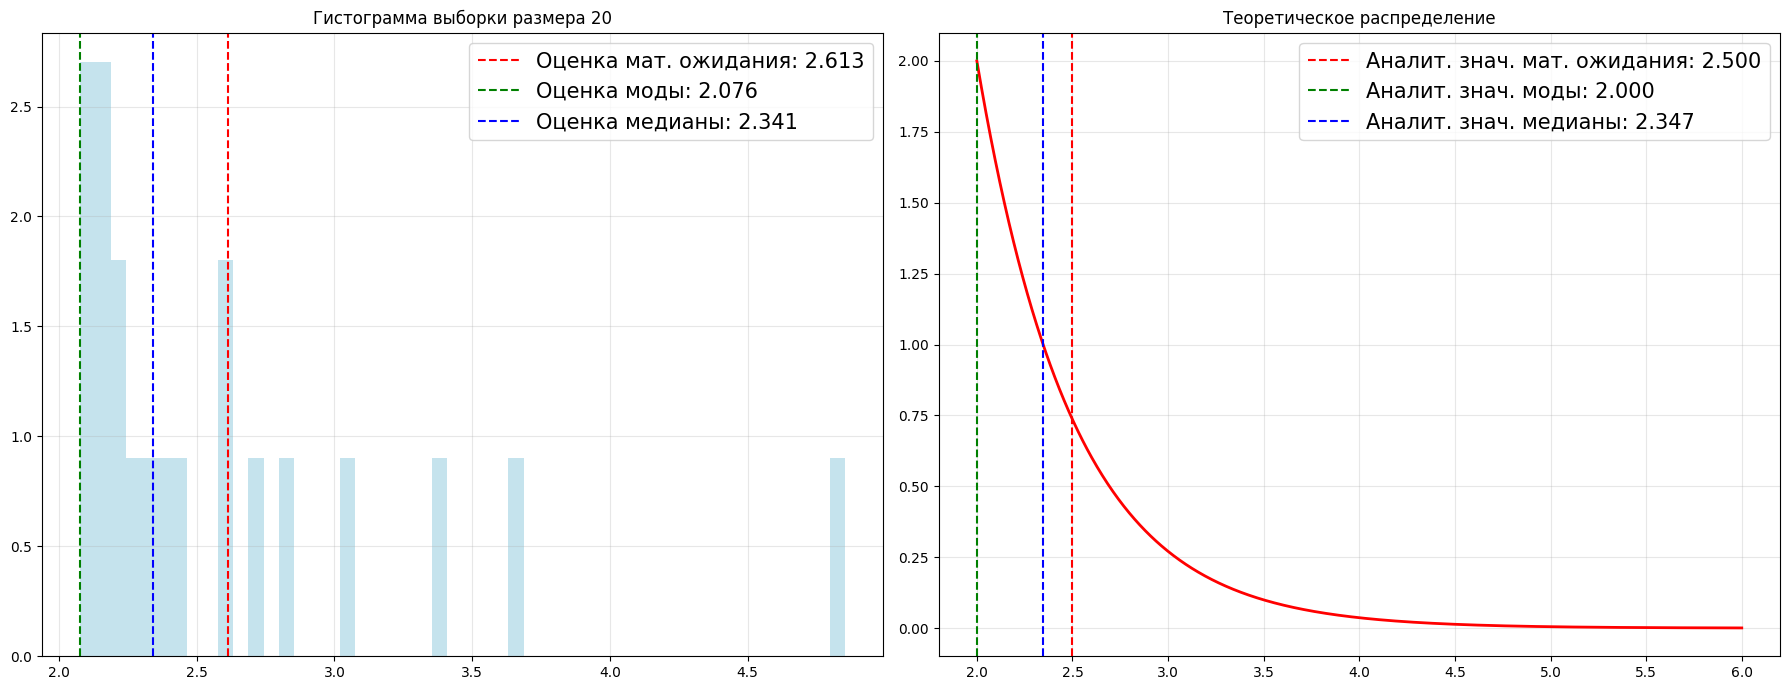

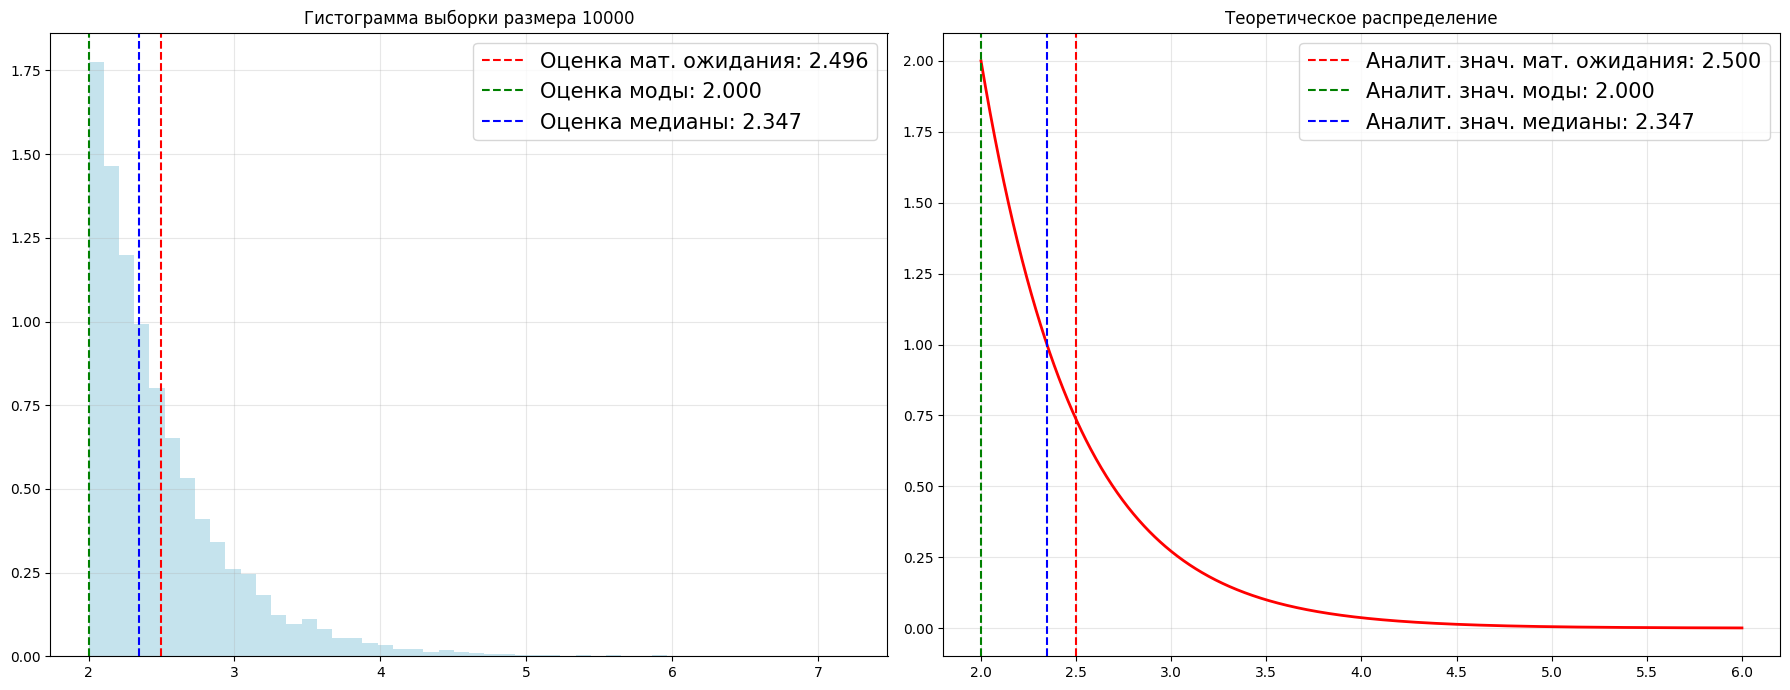

In [92]:
for size in sizes:
    
    x = generate_sample(size)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 7))

    ax1.hist(x, bins = 50, density = True, alpha = 0.7, color = 'lightblue')
    ax1.axvline(x = x.mean(), color = 'r', linestyle = '--', linewidth = 1.5, 
                label = f'Оценка мат. ожидания: {x.mean():.3f}')
    ax1.axvline(x = stats.mode(x)[0], color = 'g', linestyle = '--', linewidth = 1.5, 
                label = f'Оценка моды: {stats.mode(x)[0]:.3f}')
    ax1.axvline(x = np.median(x), color = 'b', linestyle = '--', linewidth = 1.5, 
                label = f'Оценка медианы: {np.median(x):.3f}')

    ax1.grid(True, alpha = 0.3)
    ax1.set_title(f'Гистограмма выборки размера {size}')
    ax1.legend(fontsize = 15)

    x_theor = np.linspace(2, 6, 1000)
    y_theor = 2 * np.exp(-2 * (x_theor - 2))

    ax2.plot(x_theor, y_theor, 'r-', linewidth = 2)
    ax2.axvline(x = theor_mean, color = 'r', linestyle = '--', linewidth = 1.5, 
                label = f'Аналит. знач. мат. ожидания: {theor_mean:.3f}')
    ax2.axvline(x = theor_mode, color = 'g', linestyle = '--', linewidth = 1.5, 
                label = f'Аналит. знач. моды: {theor_mode:.3f}')
    ax2.axvline(x = theor_median, color = 'b', linestyle = '--', linewidth = 1.5, 
                label = f'Аналит. знач. медианы: {theor_median:.3f}')

    ax2.grid(True, alpha = 0.3)
    ax2.set_title('Теоретическое распределение')
    ax2.legend(fontsize = 15)

    plt.tight_layout()
    plt.show()

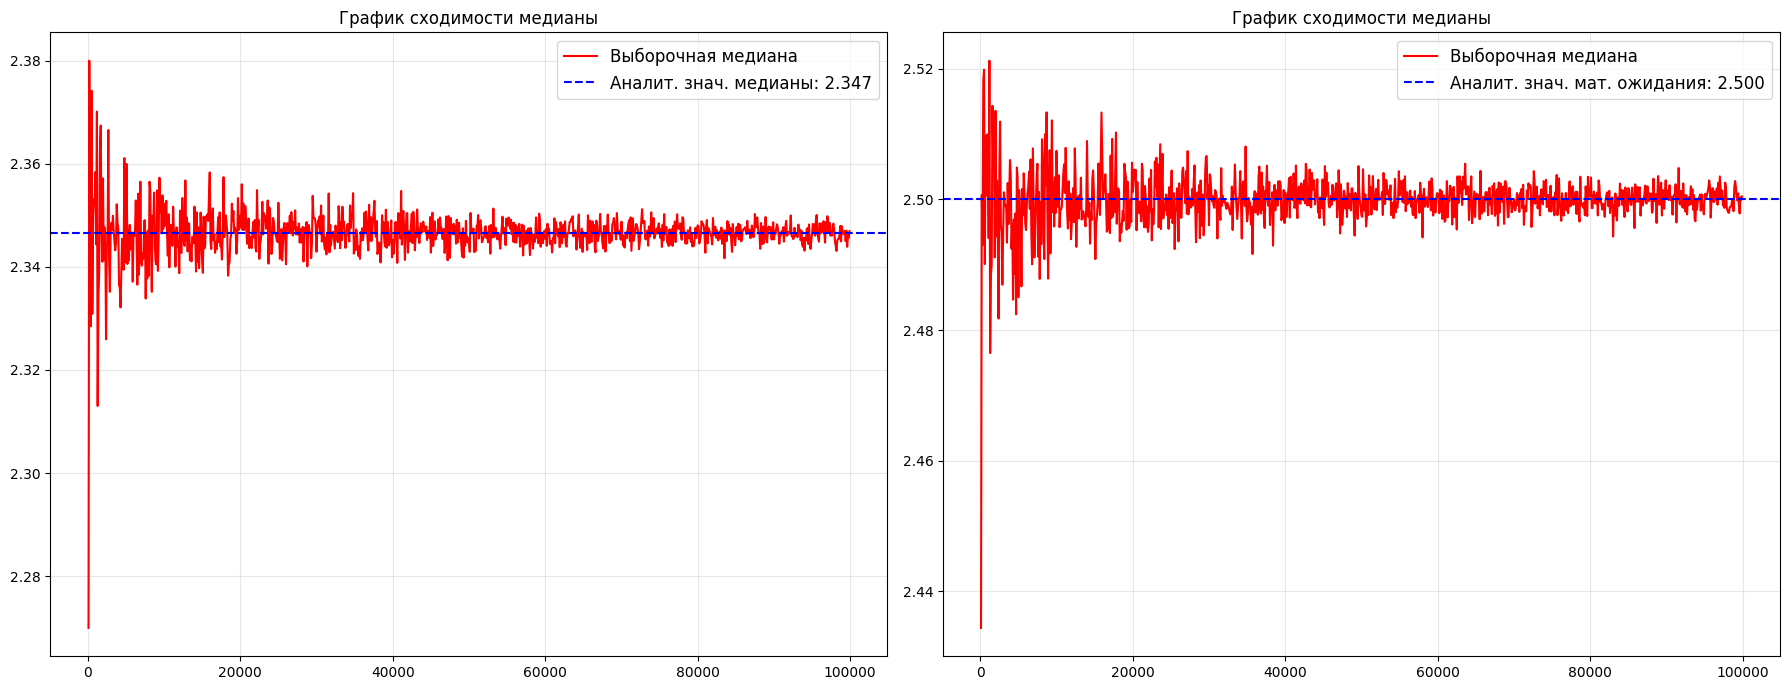

In [93]:
sizes = [i for i in range(100, 100000, 100)]
x_median = []
x_mean = []

for size in sizes:
    x = generate_sample(size)
    x_median.append(np.median(x))
    x_mean.append(x.mean())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 7))

ax1.plot(sizes, x_median, c = 'r', label = 'Выборочная медиана')
ax1.axhline(y = theor_median, color = 'b', linestyle = '--', linewidth = 1.5, 
            label = f'Аналит. знач. медианы: {theor_median:.3f}')

ax1.grid(True, alpha = 0.3)
ax1.set_title('График сходимости медианы')
ax1.legend(fontsize = 12)

ax2.plot(sizes, x_mean, c = 'r', label = 'Выборочная медиана')
ax2.axhline(y = theor_mean, color = 'b', linestyle = '--', linewidth = 1.5, 
            label = f'Аналит. знач. мат. ожидания: {theor_mean:.3f}')

ax2.grid(True, alpha = 0.3)
ax2.set_title('График сходимости медианы')
ax2.legend(fontsize = 12)

plt.tight_layout()
plt.show()

## 1.2 Моделирование совместного распределения двух СВ

Пусть совместное распределение двух случайных величин задано таблицей

$$
\begin{array}{|c|c|c|c|c|}
\hline
\xi \backslash \eta & 1 & 2 & 3 & \cdots \\
\hline
-1 & \frac{2}{5} \cdot \frac{1}{2^1} &  \frac{2}{5} \cdot \frac{1}{2^2} & \frac{2}{5} \cdot \frac{1}{2^3} & \cdots \\
\hline
0 & \frac{1}{5} \cdot \frac{1}{2^1} &  \frac{1}{5} \cdot \frac{1}{2^2} & \frac{1}{5} \cdot \frac{1}{2^3} & \cdots \\
\hline
1 & \frac{2}{5} \cdot \frac{1}{2^1} &  \frac{2}{5} \cdot \frac{1}{2^2} & \frac{2}{5} \cdot \frac{1}{2^3} & \cdots \\
\hline
\end{array}
$$

где $\xi$ принимает все значения из $\mathbb{N}$. Вычислить корреляционую матрицу аналитически и приближенно (на основе моделирования).

*Аналитически:*

**Cовместное распределение:**

$$
P(\xi = x, \eta = y) = \left\{\frac{a}{5} \cdot \frac{1}{2^y}, x \in \left\{-1, 0, 1 \right\}, y \in \mathbb{N} \right\}
$$

$$
a = \left\{ \begin{array}{cl}
2, & \ x \in \left\{-1, 1 \right\}\\
1, &  \ x = 0
\end{array} \right.
$$

Сумма по строке $\eta = k$:

$$
(\frac{2}{5} + \frac{1}{5} + \frac{2}{5}) \frac{1}{2^k} = \frac{1}{2^k}
$$

Проверка нормировки:

$$
\sum_{y = 1}^{+\infty} \frac{1}{2^y} = 1
$$

$$
\lim_{y \to +\infty} \frac{1}{2^y} = \lim_{y \to +\infty} \frac{\sum_{y = 1}^{+\infty} 2^y}{2^y} = \lim_{y \to +\infty} \frac{2^y - 1}{2^y} = 1
$$

**Маргинальные распределения:**

Ряд распределения СВ $\xi$: 

$$
\begin{array}{|c|c|c|c|}
\hline
\xi & -1 & 0 & 1 \\
\hline
P & \frac{2}{5} & \frac{1}{5} & \frac{2}{5} \\
\hline
\end{array}
$$

Ряд распределения СВ $\eta$: 

$$
\begin{array}{|c|c|c|c|c|}
\hline
\eta & 1 & 2 & 3 & \dots\\
\hline
P & \frac{1}{2} & \frac{1}{4} & \frac{1}{8} & \dots \\
\hline
\end{array}
$$

$\eta$ имеет геометрическое распределение $P(y = k) = q^{(k - 1}p$, гду $p = \frac{1}{2}, q = \frac{1}{2}$

**Математические ожидания:**

$$E\xi = -1 \cdot \frac{2}{5} + 1 \cdot \frac{2}{5} = 0$$

$$E\eta = \frac{1}{p} = 2$$

**Диспресии:**

$$D\xi = 1 \cdot \frac{2}{5} + 1 \cdot \frac{2}{5} = \frac{4}{5}$$

$$D\eta = \frac{q}{p^2} = \frac{1}{2 \cdot \frac{1}{2^2}} = 2$$

**Ковариация:**

$$
\text{cov}(\xi, \eta) = E[\xi, \eta] - E\xi E\eta
$$

$$
E[\xi, \eta] = \sum_{x, y}xyP(x, y) = -1 \cdot \frac{2}{5} \sum_{y = 1}^{+\infty} \frac{1}{2^y} + 1 \cdot \frac{2}{5} \sum_{y = 1}^{+\infty} \frac{1}{2^y} = 0
$$

$$
\text{cov}(\xi, \eta) = 0 - 0 \cdot 2 = 0
$$

**Корреляционная матрица:**

$$
P_{(\xi, \eta)} = 
\begin{pmatrix}
    \rho(\xi, \xi) & \rho(\xi, \eta) \\
    \rho(\eta, \xi) & \rho(\eta, \eta)
\end{pmatrix}
$$

$$
P_{(\xi, \eta)} = 
\begin{pmatrix}
    1 & 0 \\
    0 & 1
\end{pmatrix}
$$

*Приближенно:*

In [109]:
def generate_joint_sample(size):
    xi_values = [-1, 0, 1]
    xi_probs = [2 / 5, 1 / 5, 2 / 5]
    
    xi_sample = np.random.choice(xi_values, size = size, p = xi_probs)
    eta_sample = np.random.geometric(0.5, size = size)
    
    return xi_sample, eta_sample

In [110]:
size = 100000
xi, eta = generate_joint_sample(size)

In [111]:
print("Выборочные характеристики:")
print(f"E[ξ] = {np.mean(xi):.3f} (аналит. знач.: 0)")
print(f"E[η] = {np.mean(eta):.3f} (аналит. знач.: 2)")
print(f"D[ξ] = {np.var(xi):.3f} (аналит. знач.: 0.8)")
print(f"D[η] = {np.var(eta):.3f} (аналит. знач.: 2)")

Выборочные характеристики:
E[ξ] = 0.002 (аналит. знач.: 0)
E[η] = 2.002 (аналит. знач.: 2)
D[ξ] = 0.798 (аналит. знач.: 0.8)
D[η] = 2.021 (аналит. знач.: 2)


In [112]:
cov = np.round(np.cov(xi, eta)[0, 1], 3)
print(f"cov(ξ, η) = {cov:.3f} (аналит. знач.: 0)")

cov(ξ, η) = -0.005 (аналит. знач.: 0)


In [113]:
print("Корреляционная матрица (выборочная):")
corr_matrix = np.round(np.corrcoef(xi, eta))
print(corr_matrix)

Корреляционная матрица (выборочная):
[[ 1. -0.]
 [-0.  1.]]
